In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Fetch stock data
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Calculate True Range
stock_data['High-Low'] = stock_data['High'] - stock_data['Low']
stock_data['High-PrevClose'] = abs(stock_data['High'] - stock_data['Close'].shift(1))
stock_data['Low-PrevClose'] = abs(stock_data['Low'] - stock_data['Close'].shift(1))
stock_data['TrueRange'] = stock_data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

In [4]:
# Calculate ATR
atr_period = 14
stock_data['ATR'] = stock_data['TrueRange'].rolling(window=atr_period).mean()

In [5]:
# Impulse Detection
price_change_threshold = 2  # Customize this value as needed
stock_data['PriceChange'] = stock_data['Close'].pct_change()
stock_data['Impulse'] = np.where(stock_data['PriceChange'].abs() > price_change_threshold / 100, 1, 0)

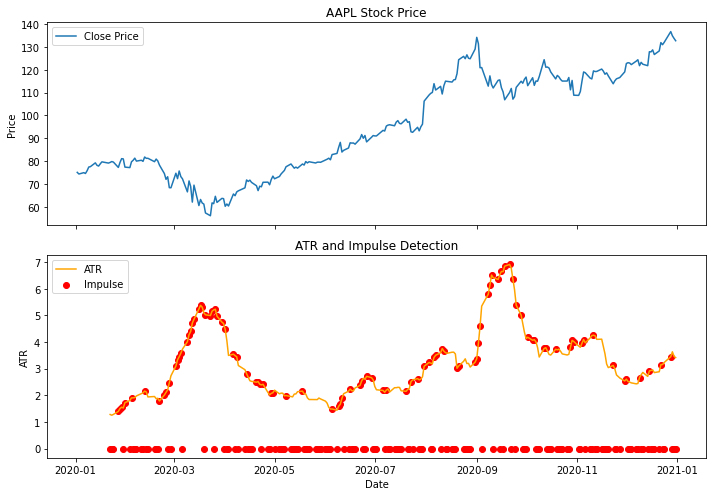

In [9]:
# Plot stock data, ATR, and impulse detection
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
ax1.plot(stock_data.index, stock_data['Close'], label='Close Price')
ax1.set_title(f'{ticker} Stock Price')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

ax2.plot(stock_data.index, stock_data['ATR'], label='ATR', color='orange')
ax2.scatter(stock_data.index, stock_data['Impulse'] * stock_data['ATR'], label='Impulse', color='red')
ax2.set_title('ATR and Impulse Detection')
ax2.set_xlabel('Date')
ax2.set_ylabel('ATR')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()